In [80]:
# Magic function that helps make plot outputs appear and be stored within the notebook
%matplotlib inline

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json
import time
import random

# Brings in my api from the config file and pip installed Citipy
from api_keys import api_key
from citipy import citipy

In [82]:
# Creates lists to hold the randomly generated latitudes and Longitudes 
lat_list = []
lng_list = []

#Variables to store the provided ranges of latitudes and longitudes surrounding the equator
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Two distinct for loops that will add each latitude and longitude to their respective holder list
for lat in lats:
    lat_list.append(lat)
for lng in lngs:
    lng_list.append(lng)

In [83]:
# Variable that will store the created lists of randomly generated latitudes and longitudes by zipping/condensing them within a tuple so that they are immutable to change later in the script 
lat_lng = tuple(zip(lat_list,lng_list))

In [84]:
# Variables that store the cities and countrys based on the latitudes and longitudes stored in the previous tuple
city_list = []
country_list = []

# For loop that references the citipy library to find the nearest city for all latitudes and longitudes using ".city_name" and ".country_code" then adds/appends them to their respective holder list 
for lat,lng in lat_lng:
    city_pull = citipy.nearest_city(lat,lng)   
    city_name = city_pull.city_name    
    city_list.append(city_name)    
    country_list.append(city_pull.country_code)

In [85]:
# Prints the number of generated citys found from the for loop by finding the length of the converted set using the set function of the created "city_list"
# Set function : https://www.programiz.com/python-programming/methods/built-in/set
print('{} cities have been generated.'.format(len(set(city_list))))

589 cities have been generated.


In [92]:
# Creates a dataframe storing the list of cities and countries gathered
country_df = pd.DataFrame({'Cities': city_list, 'Country': country_list})

# Creates empty holders for info within dataframe once api brings in data 
country_df['Lat'] = ''
country_df['Lng'] = ''
country_df['Temperature'] = ''
country_df['Humidity'] = ''
country_df['Cloudiness'] = ''
country_df['Wind Speed'] = ''

# Drops any duplicate headers and places Cities as the first header
country_df = country_df.drop_duplicates(subset=['Cities'],keep='first')
country_df.head()

,Cities,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed
0,port alfred,za,,,,,,
1,kyaukse,mm,,,,,,
3,tuatapere,nz,,,,,,
4,nikolskoye,ru,,,,,,
5,rikitea,pf,,,,,,


In [96]:
# For loop that goes through all rows to fill in values for blank columns in the above created dataframe
# Used the iterrow function to append all of the rows in the Dataframe
# .iterrows() , https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html
for num, row in country_df.iterrows():
    city_name = row['Cities']
    country_name = row['Country']
    
# Variable that stores the url that the website provides with regards to their specific format in order to pull info using my api key 
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name, country_name, api_key)        
# Variable that pulls the data in json formatting   
    country_info = requests.get(api_url).json()
    
# Prints all of the api urls to view as the output to check for accuracy and referencing 
    print(api_url)

# Try and except statements that will pull in api urls and if one is found to have missing or NaN values then overrides it with a statement labeled "Overrided , missing information" instead of displaying keyerror info
# Uses "num" variable through each row pulling only specific data from the first position in list/ city followed by the next header in sequence in order to pull accurate data with respect to what I'm looking for such as cloudiness, humidity, lat, etc.    
# Uses .set_value() function to put values as a passed column and index when pulled , https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_value.html
# Also, I get an error message stating .at[] or .iat[] is recommended but when using those functions returns an error message and only returns 1 api, I am not sure why...?  

    try:
        country_df.set_value(num,'Cloudiness',country_info['list'][0]['clouds']['all'])
        country_df.set_value(num,'Humidity',country_info['list'][0]['main']['humidity'])
        country_df.set_value(num,'Lat',country_info['city']['coord']['lat'])
        country_df.set_value(num,'Lng',country_info['city']['coord']['lon'])
        country_df.set_value(num,'Temperature',country_info['list'][0]['main']['temp'])
        country_df.set_value(num,'Humidity',country_info['list'][0]['main']['humidity'])
        country_df.set_value(num,'Wind Speed',country_info['list'][0]['wind']['speed'])        
    except KeyError:
        country_df.set_value(num,'Cloudiness',np.nan)
        country_df.set_value(num,'Humidity',np.nan)
        country_df.set_value(num,'Lat',np.nan)
        country_df.set_value(num,'Lng',np.nan)
        country_df.set_value(num,'Temperature',np.nan)
        country_df.set_value(num,'Wind Speed',np.nan)   
        print('Overrided , missing information')

http://api.openweathermap.org/data/2.5/forecast?q=port alfred,za&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=kyaukse,mm&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef


C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\s

http://api.openweathermap.org/data/2.5/forecast?q=tuatapere,nz&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=nikolskoye,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=east london,za&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=khatanga,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=buluang,ph&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=tuktoyaktuk,ca&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=upernavik,gl&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45

C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\btech\Anaconda3\lib\s

http://api.openweathermap.org/data/2.5/forecast?q=sitka,us&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=plettenberg bay,za&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=mizque,bo&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=buraydah,sa&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=mugur-aksy,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=valkeala,fi&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc452

http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=kayasula,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=los lunas,us&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=butaritari,ki&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=kruisfontein,za&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=kaitangata,nz&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=tiksi,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=santo antonio do ica,br&units=IMPERIAL&mode=json&APPID=b2223b954

http://api.openweathermap.org/data/2.5/forecast?q=santa marta,co&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=kahului,us&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=ilulissat,gl&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=talara,pe&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=muisne,ec&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=alofi,nu&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=logansport,us&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=springbok,za&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801ba

http://api.openweathermap.org/data/2.5/forecast?q=waddan,ly&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=narsaq,gl&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=palu,id&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=soyo,ao&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=constitucion,mx&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=saleaula,ws&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
Overrided , missing information
http://api.openweathermap.org/data/2.5/forecast?q=kapitanivka,ua&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=yantzaza,ec&units=IMPERIAL&mode=json&APPI

http://api.openweathermap.org/data/2.5/forecast?q=mys shmidta,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
Overrided , missing information
http://api.openweathermap.org/data/2.5/forecast?q=yian,cn&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
Overrided , missing information
http://api.openweathermap.org/data/2.5/forecast?q=ucluelet,ca&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=amnat charoen,th&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=dryden,ca&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=alugan,ph&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=chagda,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
Overrided , missing information
http://api.openweatherma

http://api.openweathermap.org/data/2.5/forecast?q=sorvag,fo&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
Overrided , missing information
http://api.openweathermap.org/data/2.5/forecast?q=shimoda,jp&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=tokat,tr&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=gagarin,uz&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=kavieng,pg&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=louisbourg,ca&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
Overrided , missing information
http://api.openweathermap.org/data/2.5/forecast?q=tiarei,pf&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=olinda,br&un

http://api.openweathermap.org/data/2.5/forecast?q=souillac,mu&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=pangnirtung,ca&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=tumannyy,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
Overrided , missing information
http://api.openweathermap.org/data/2.5/forecast?q=banjar,id&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=sao felix do xingu,br&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=omboue,ga&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=iqaluit,ca&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=orissaare,ee&units=IMPERIAL&

http://api.openweathermap.org/data/2.5/forecast?q=dusti,tj&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=porto belo,br&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=mayo,ca&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=sur,om&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=shimanovsk,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=bengkulu,id&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
Overrided , missing information
http://api.openweathermap.org/data/2.5/forecast?q=khonuu,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
Overrided , missing information
http://api.openweathermap.org/data/2.5/forecast?q=port macquarie

http://api.openweathermap.org/data/2.5/forecast?q=kuala terengganu,my&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=barcelona,ph&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=keffi,ng&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=luganville,vu&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=hamilton,bm&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=sivaki,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=fairbanks,us&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc45257e801baf044ef
http://api.openweathermap.org/data/2.5/forecast?q=vanavara,ru&units=IMPERIAL&mode=json&APPID=b2223b9547adbdc452

In [97]:
# Changes all the values that enter into the empty DataFrame to numeric values
country_df['Lat'] = pd.to_numeric(country_df['Lat'])
country_df['Lng'] = pd.to_numeric(country_df['Lng'])
country_df['Temperature'] = pd.to_numeric(country_df['Temperature'])
country_df['Humidity'] = pd.to_numeric(country_df['Humidity'])
country_df['Cloudiness'] = pd.to_numeric(country_df['Cloudiness'])
country_df['Wind Speed'] = pd.to_numeric(country_df['Wind Speed'])

In [98]:
# Views the DataFrame 10 Rows Down
country_df.head(10)

,Cities,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
0,port alfred,za,-33.5906,26.8910,46.90,80.0,88.0,18.01,46.90
1,kyaukse,mm,21.6000,96.1333,97.56,48.0,93.0,14.50,97.56
3,tuatapere,nz,-46.1324,167.6908,49.73,89.0,100.0,17.43,49.73
4,nikolskoye,ru,59.7035,30.7861,61.50,92.0,99.0,5.17,61.50
5,rikitea,pf,-23.1203,-134.9692,67.71,58.0,71.0,11.97,67.71
6,east london,za,-33.0153,27.9116,47.41,82.0,52.0,18.63,47.41
8,khatanga,ru,71.9801,102.4743,82.47,32.0,71.0,12.33,82.47
9,buluang,ph,10.4667,123.9833,90.00,68.0,55.0,3.44,90.00
10,tuktoyaktuk,ca,69.4440,-133.0320,47.26,96.0,100.0,12.30,47.26
11,upernavik,gl,72.7868,-56.1549,44.46,96.0,100.0,15.95,44.46


In [99]:
# Formula used to calculate the number of missing countries from the above DataFrame
original_len = len(country_df)
after_dropna_len = len(country_df.dropna())
missing_info = original_len - after_dropna_len

In [100]:
# Print statements showing the amount of cities dropped and remaining within the DataFrame
print('{} cities did not contain weather info.'.format(missing_info))
print("{} cities did contain weather info.".format(len(country_df.dropna())))

73 cities did not contain weather info.
516 cities did contain weather info.


In [101]:
# Variables that drop na vaues and outputs the file to a csv.
country_df = country_df.dropna()
country_df.to_csv(path_or_buf='country_df.csv')

In [104]:
# Variable that creates a copy of the latitude and slices it from the DataFrame "country_df"
country_df_table = country_df.copy()
country_df_table['Lat'] = pd.qcut(country_df['Lat'],11,precision=0)

In [107]:
# Groups the above slice from latitude and compares to the temperature 
country_df_table.groupby(['Lat'])['Temperature'].mean().reset_index()

,Lat,Temperature
0,"(-56.0, -30.0]",50.284681
1,"(-30.0, -18.0]",64.107447
2,"(-18.0, -7.0]",70.239787
3,"(-7.0, 5.0]",77.227447
4,"(5.0, 17.0]",80.282979
5,"(17.0, 29.0]",81.550435
6,"(29.0, 38.0]",79.167872
7,"(38.0, 47.0]",77.000213
8,"(47.0, 53.0]",66.702340
9,"(53.0, 63.0]",61.622979


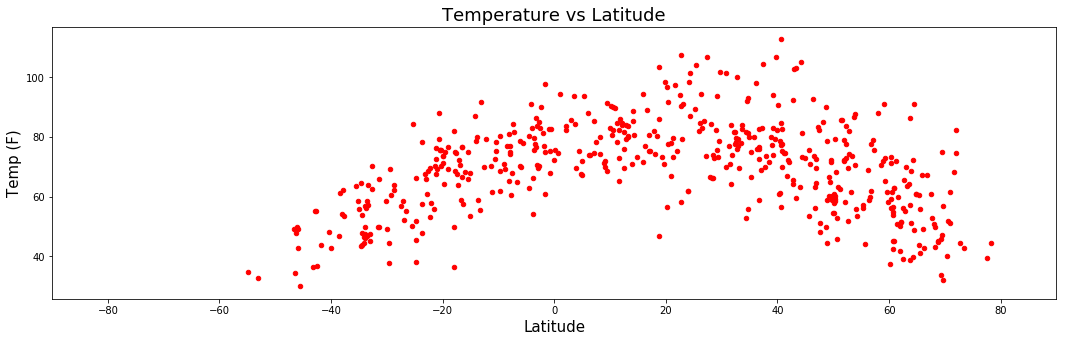

In [109]:
# Creates a scatterplot of the "Temperature vs Latitude" data
plt.figure(figsize=(18,5))
plt.scatter(country_df['Lat'],country_df['Temperature'],color = 'red',s=20)
plt.title('Temperature vs Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Temp (F)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [110]:
# Groups the above slice from latitude and compares to the Humidity
country_df.groupby(['Lat'])['Humidity'].mean().reset_index()

,Lat,Humidity
0,-54.8070,87.0
1,-53.1627,78.0
2,-46.6000,87.0
3,-46.4276,62.0
4,-46.2818,97.0
5,-46.1324,89.0
6,-45.8740,89.0
7,-45.8654,52.0
8,-45.5753,98.0
9,-43.2992,56.0


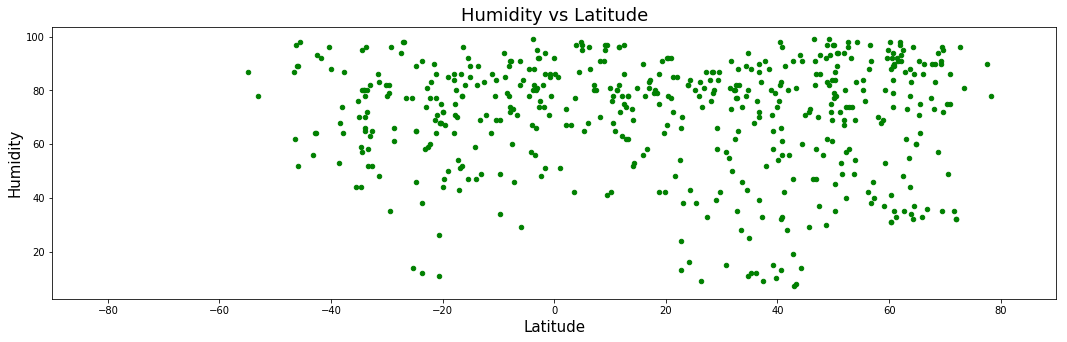

In [114]:
# Creates a scatterplot of the "Latitude vs Humidity" data
plt.figure(figsize=(18,5))
plt.scatter(country_df['Lat'],country_df['Humidity'],color = 'green',s=20);
plt.title('Humidity vs Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Humidity (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [115]:
# Groups the above slice from latitude and compares to the Cloudiness
country_df_table.groupby(['Lat'])['Cloudiness'].mean().reset_index()

,Lat,Cloudiness
0,"(-56.0, -30.0]",53.000000
1,"(-30.0, -18.0]",25.000000
2,"(-18.0, -7.0]",30.489362
3,"(-7.0, 5.0]",56.404255
4,"(5.0, 17.0]",70.872340
5,"(17.0, 29.0]",49.543478
6,"(29.0, 38.0]",36.404255
7,"(38.0, 47.0]",26.531915
8,"(47.0, 53.0]",52.297872
9,"(53.0, 63.0]",60.574468


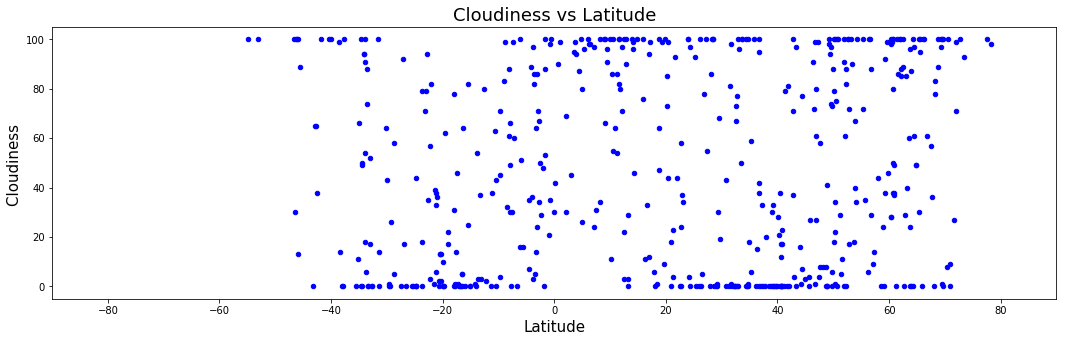

In [117]:
# Creates a scatterplot of the "Latitude vs Cloudiness" data
plt.figure(figsize=(18,5))
plt.scatter(country_df['Lat'],country_df['Cloudiness'],color = 'b',s=20);
plt.title('Cloudiness vs Latitude',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Cloudiness ',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [120]:
# Groups the above slice from latitude and compares to the Wind Speed
country_df_table.groupby(['Lat'])['Wind Speed'].mean().reset_index()

,Lat,Wind Speed
0,"(-56.0, -30.0]",12.753404
1,"(-30.0, -18.0]",10.637660
2,"(-18.0, -7.0]",9.734681
3,"(-7.0, 5.0]",7.177447
4,"(5.0, 17.0]",10.932553
5,"(17.0, 29.0]",9.201739
6,"(29.0, 38.0]",10.095745
7,"(38.0, 47.0]",8.908511
8,"(47.0, 53.0]",7.222766
9,"(53.0, 63.0]",8.430426


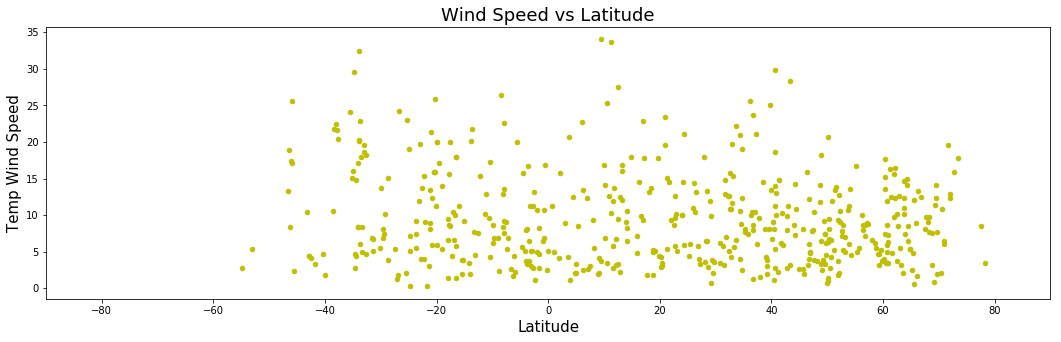

In [121]:
# Creates a scatterplot of the "Latitude vs Windspeed" data
plt.figure(figsize=(18,5))
plt.scatter(country_df['Lat'], country_df['Wind Speed'],color = 'y',s=20);
plt.xlim(-90,90)
plt.title('Wind Speed vs Latitude',fontsize=(18));
plt.ylabel('Temp Wind Speed',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [122]:
print("The average wind speed is {} mph across all of the randomly generated cities".format(country_df['Wind Speed'].mean()))

The average wind speed is 9.43691860465116 mph across all of the randomly generated cities


Conclusion
The average wind speeds are higher at the north and south poles.
As the latitude increases the temperature increases for the Temp vs Lat scatter plot. 
The average wind speed for all cities is low in the Wind Speed vs Lat scatter plot.